In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Attention : dans les données de prévisions 2023 il manque 5 valeurs au 31 décembre 2023 il manque les valeurs de 7h à midi. Ainsi on retire les même valeurs des relevés pour pouvoir faire de bonnes comparaisons.

In [4]:
past_forecast = pd.read_csv('hourly_past_predicted_temperature_2m_2023.csv')
historical_data = pd.read_csv('hourly_past_real_temperature_2m_2023.csv')
historical_data = historical_data.rename(columns={historical_data.columns[0]: 'compteur'})
past_forecast = past_forecast.rename(columns={past_forecast.columns[0]: 'compteur'})
print(len(historical_data))
print(len(past_forecast))

245280
245140


In [5]:
for j in range(0,27):
        print(historical_data["date"].iloc[j*8760+8743])
        print(past_forecast["date"].iloc[j*8755+8743-1])
        print(past_forecast["date"].iloc[j*8755+8743])
        print("")
        

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00


In [6]:
past_forecast_provisoire = past_forecast[~(past_forecast["compteur"].isin([8743,8744,8745,8746,8747]))]
print(len(past_forecast_provisoire))


245140


In [7]:
for j in range(0,27):
        print(historical_data["date"].iloc[j*8760+8743-1])
        print(historical_data["date"].iloc[j*8760+8743])
        print(past_forecast_provisoire["date"].iloc[j*8755+8743-1])
        print(past_forecast_provisoire["date"].iloc[j*8755+8743])
        print("")

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
2023-12-31 06:00:00+00:00
2023-12-31 12:00:00+00:00

2023-12-31 06:00:00+00:00
2023-12-31 07:00:00+00:00
202

In [8]:
past_forecast_provisoire["real_temperature_2m"]=historical_data["real_temperature_2m"]
past_forecast_provisoire["error"]=past_forecast_provisoire["temperature_2m"]-past_forecast_provisoire["real_temperature_2m"]
past_forecast_provisoire["absolute_error"]=abs(past_forecast_provisoire["error"])

In [9]:
past_forecast_provisoire['date'] = pd.to_datetime(past_forecast_provisoire['date'])

In [10]:
past_forecast_provisoire.describe()

,compteur,temperature_2m,latitude,longitude,real_temperature_2m,error,absolute_error
count,245140.000000,245140.000000,245140.000000,245140.000000,245140.000000,245140.000000,245140.000000
mean,4377.006853,12.906437,46.000000,1.000000,12.914757,-0.008321,3.284721
std,2527.367802,7.444778,2.236073,4.000008,7.331233,4.587575,3.202572
min,0.000000,-21.815500,43.000000,-5.000000,-26.635500,-23.978000,0.000000
25%,2188.000000,8.400000,44.500000,-3.000000,8.475500,-2.250000,0.900000
50%,4377.000000,12.981500,46.000000,1.000000,13.049500,0.034499,2.200000
75%,6566.000000,18.041500,47.500000,5.000000,18.035501,2.150000,4.723500
max,8759.000000,41.349503,49.000000,7.000000,41.149500,23.398000,23.978000


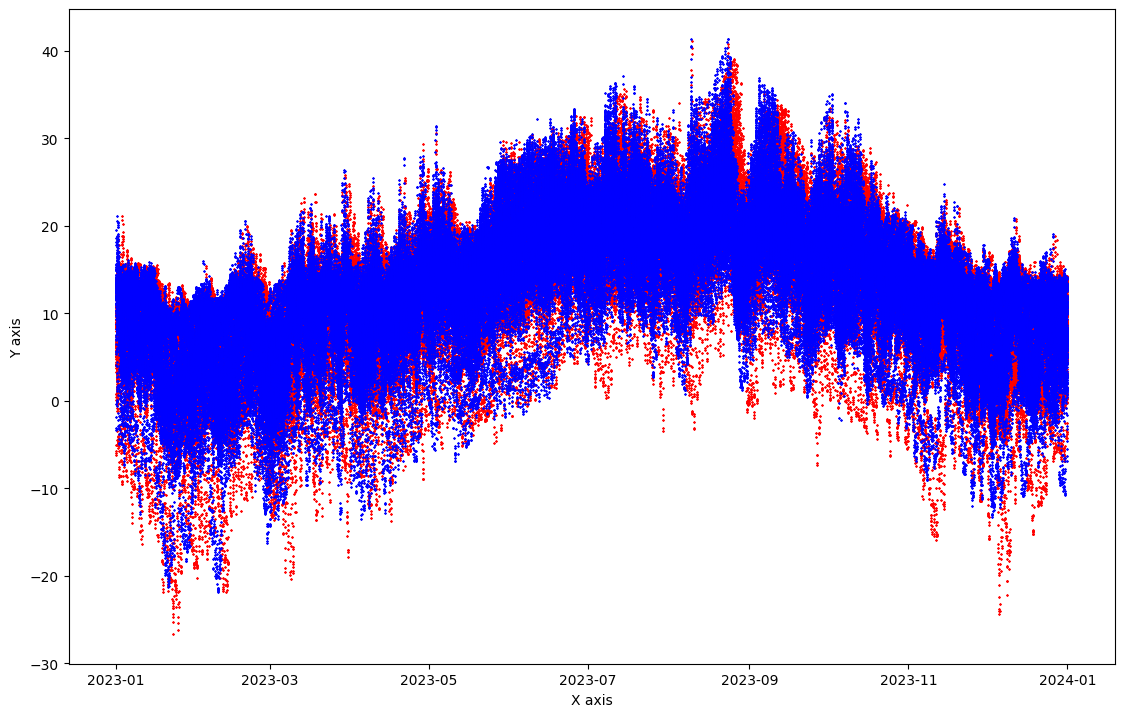

In [11]:
x = past_forecast_provisoire["date"]
y1 = past_forecast_provisoire["real_temperature_2m"]
y2 = past_forecast_provisoire["temperature_2m"]

fig = plt.figure(figsize=(13.5,8.5))

# Scatter plot the points
plt.scatter(x, y1, c='r', marker='X', s=0.5) # température réelle 
plt.scatter(x, y2, c='b', marker='X', s=0.5)  # température prédite par le modèle 

# Set labels
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()

In [12]:
janvier = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 1]
fevrier = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 2]
mars = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 3]
avril = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 4]

mai = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 5]
juin = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 6]
juillet = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 7]
aout = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 8]

septembre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 9]
octobre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 10]
novembre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 11]
decembre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 12]

janvier.describe()

,compteur,temperature_2m,latitude,longitude,real_temperature_2m,error,absolute_error
count,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000
mean,371.500000,5.814053,46.000000,1.000000,6.188921,-0.374869,2.652415
std,214.779261,5.968183,2.236122,4.000096,6.010715,3.631704,2.508817
min,0.000000,-21.315500,43.000000,-5.000000,-26.635500,-16.482499,0.000000
25%,185.750000,1.537000,44.500000,-3.000000,2.467000,-2.300000,0.850000
50%,371.500000,6.750000,46.000000,1.000000,7.391000,-0.250000,1.921250
75%,557.250000,10.500000,47.500000,5.000000,10.669499,1.587000,3.676625
max,743.000000,21.149500,49.000000,7.000000,21.082499,22.335500,22.335500


In [13]:
important_error=past_forecast_provisoire[past_forecast_provisoire["absolute_error"]>=10]